In [49]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

#importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- Infromation like Objectives ,data insgihts ,and model related results are present in the below PPT
<br>

[PPT](https://docs.google.com/presentation/d/16gO1LD9zkyJL0wqTklJAiRwMHRjrY3sLBnZFsNv76vc/edit#slide=id.gade2296d41_0_0)

In [50]:
orginal_data = pd.read_csv('Predict_Loan_Approval.csv') # to read the data to the dataframe

In [51]:
orginal_data.head() # to view the first five records

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y


In [52]:
orginal_data.shape # to get the number of row and columns

(480, 13)

In [53]:
orginal_data.info() # to get the basic info such has type amd number of records present in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    int64  
 9   Loan_Amount_Term   480 non-null    int64  
 10  Credit_History     480 non-null    int64  
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 48.9+ KB


In [54]:
orginal_data.describe() #gives information statistical description of numberical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [55]:
orginal_data['Loan_ID'].nunique() # gives number of unique records

480

In [56]:
# Loan_id is not a good predictor variable so it can be dropped.

In [57]:
orginal_data.drop('Loan_ID',axis = 1,inplace =True)

In [58]:
orginal_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y


In [59]:
orginal_data.columns #gives all the columns present in the data

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [60]:
for i in orginal_data.columns:
    print(orginal_data[i].value_counts(),'\n') # gives all the unique values with number of corresponding records

Male      394
Female     86
Name: Gender, dtype: int64 

Yes    311
No     169
Name: Married, dtype: int64 

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64 

Graduate        383
Not Graduate     97
Name: Education, dtype: int64 

No     414
Yes     66
Name: Self_Employed, dtype: int64 

2500    7
4583    6
2600    5
5000    4
8333    4
       ..
5800    1
3762    1
5815    1
6045    1
3691    1
Name: ApplicantIncome, Length: 405, dtype: int64 

0.0       216
1666.0      5
2500.0      4
2083.0      3
5625.0      3
         ... 
1483.0      1
1700.0      1
4648.0      1
1014.0      1
1508.0      1
Name: CoapplicantIncome, Length: 232, dtype: int64 

110    13
120    13
100    13
187    12
128     9
       ..
216     1
218     1
228     1
230     1
9       1
Name: LoanAmount, Length: 186, dtype: int64 

360    411
180     36
480     12
300      9
120      3
84       3
240      2
60       2
36       2
Name: Loan_Amount_Term, dtype: int64 

1    410
0     70
Name: Cr

In [61]:
# replacing '3+' with '3' 

In [62]:
orginal_data['Dependents'].replace('3+','3',inplace = True)
orginal_data['Dependents'].unique()

array(['1', '0', '2', '3'], dtype=object)

In [63]:
#combining the Applicant Income and Coapplicant Income
orginal_data['total_income'] = orginal_data['ApplicantIncome'] + orginal_data['CoapplicantIncome']
orginal_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N,6091.0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y,3000.0
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y,4941.0
3,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y,6000.0
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y,9613.0


In [64]:
orginal_data.drop(['ApplicantIncome','CoapplicantIncome'], axis = 1, inplace = True)

In [65]:
orginal_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,Male,Yes,1,Graduate,No,128,360,1,Rural,N,6091.0
1,Male,Yes,0,Graduate,Yes,66,360,1,Urban,Y,3000.0
2,Male,Yes,0,Not Graduate,No,120,360,1,Urban,Y,4941.0
3,Male,No,0,Graduate,No,141,360,1,Urban,Y,6000.0
4,Male,Yes,2,Graduate,Yes,267,360,1,Urban,Y,9613.0


In [66]:
# Loan_amount_term is in months by dividing it by 12 we can get the column values in years

In [67]:
orginal_data['Loan_Amount_Term_Years'] = orginal_data['Loan_Amount_Term']/12

In [68]:
orginal_data.drop('Loan_Amount_Term', axis =1,inplace =True)
orginal_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,total_income,Loan_Amount_Term_Years
0,Male,Yes,1,Graduate,No,128,1,Rural,N,6091.0,30.0
1,Male,Yes,0,Graduate,Yes,66,1,Urban,Y,3000.0,30.0
2,Male,Yes,0,Not Graduate,No,120,1,Urban,Y,4941.0,30.0
3,Male,No,0,Graduate,No,141,1,Urban,Y,6000.0,30.0
4,Male,Yes,2,Graduate,Yes,267,1,Urban,Y,9613.0,30.0


In [69]:
orginal_data['Credit_History'].value_counts()

1    410
0     70
Name: Credit_History, dtype: int64

In [70]:
orginal_data['Credit_History'].unique()

array([1, 0], dtype=int64)

In [71]:
orginal_data.to_csv('Predict_Loan_Approval_new.csv')

## Visualization

In [72]:
orginal_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Credit_History', 'Property_Area', 'Loan_Status',
       'total_income', 'Loan_Amount_Term_Years'],
      dtype='object')

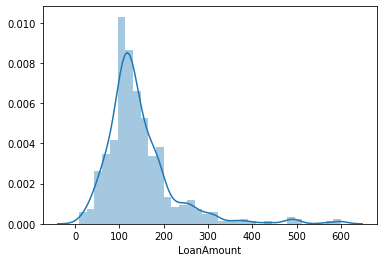

In [73]:
sns.distplot(orginal_data['LoanAmount'])

In [74]:
#Loan amount has very few values over 400

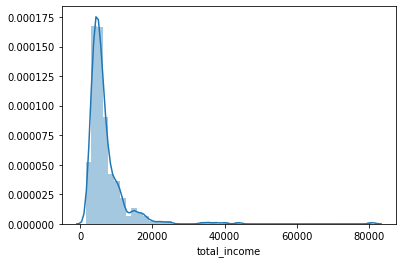

In [75]:
sns.distplot(orginal_data['total_income'])

In [76]:
# very few records have values greater than 20000

In [77]:
len(orginal_data[orginal_data['total_income'] > 25000]) # to get the number of records having total income greater than 25000

6

In [78]:
income = orginal_data[orginal_data['total_income'] < 25000]

In [79]:
income.shape

(474, 11)

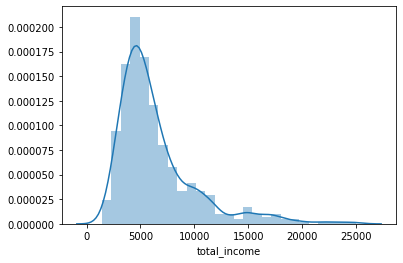

In [80]:
sns.distplot(income['total_income'])

In [81]:
df = orginal_data.copy()

In [121]:
def plots(df):
    df_cat_cols = df.select_dtypes(include= 'object' )
    df_num_cols = df.select_dtypes(include = ['int64','float64'])

    col_list = list(df_cat_cols.columns)
    b={}
    iter_val_list=iter(col_list)
    for i in range(0,len(df_cat_cols.columns)):
        b[str(i)]=next(iter_val_list)
    print(b)



    value = str(input('enter column name  : '))
    target = str(input('enter target column name  : '))


    plt.figure(figsize=(16,8))
    if value in b.keys():
        x_axis = b[value]
        target_var = b[target]

        plt.xticks(rotation = 90)
        plt.title(x_axis +' Count Plot')
        sns.countplot(df[x_axis],data = df,order = df[x_axis].value_counts().index)
        plt.show()

        plt.figure(figsize=(16,8))
        plt.title(x_axis + ' vs response count')
        plot = sns.countplot(df[x_axis],hue=df[target_var])
        for p in plot.patches:
            plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    #     plt.show()
        print('-'*100)

    elif value == 'none':
        print(' no column selected')
    elif value == 'All':
        for i in df_cat_cols.columns:
        #print('{} vs response \n'.format(i))
            plt.figure(figsize=(16,8))
            plt.title(i + ' vs response count')
            plt.xticks(rotation = 90)
            plot = sns.countplot(df[i],hue=df[target_var])
            for p in plot.patches:
                plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
            plt.show()
            print('-'*100)

{'0': 'Gender', '1': 'Married', '2': 'Dependents', '3': 'Education', '4': 'Self_Employed', '5': 'Property_Area', '6': 'Loan_Status'}
enter column name  : 5
enter target column name  : 6


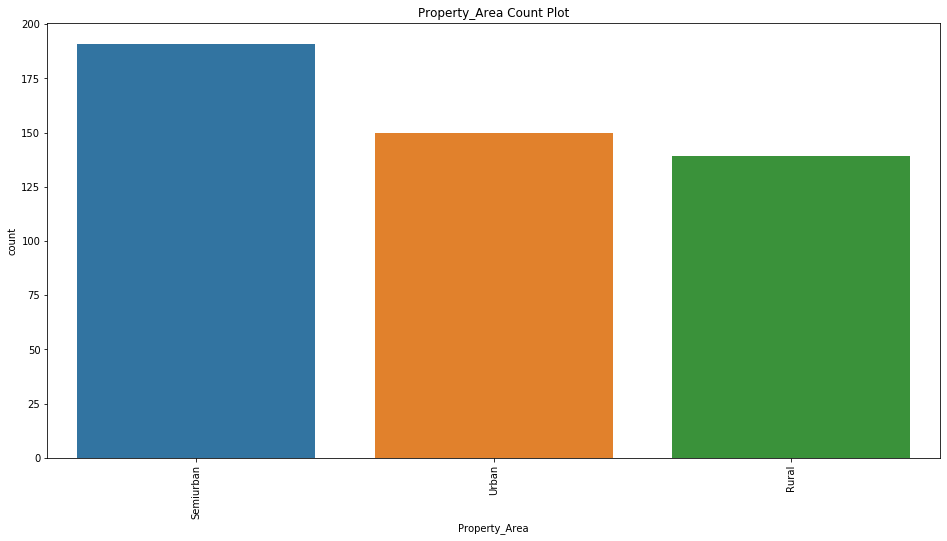

----------------------------------------------------------------------------------------------------


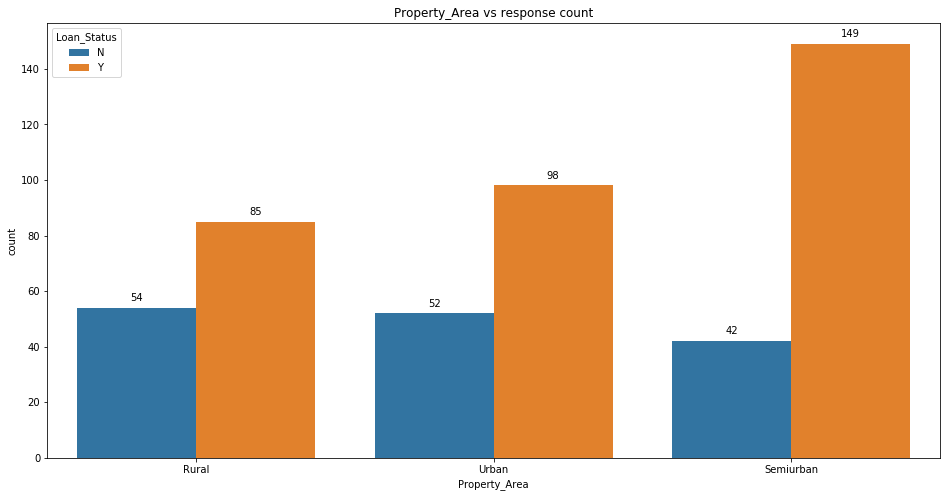

In [130]:
plots(df)

In [ ]:
#More number of applicants have no dependants 
# more number of applicants are are married and male
# people who are married have more number of dependents
# graduates have opted more for the loan
# people who are not self employed have opted more for the loan
# people who are self employed have very narrow chance of loan approval
# Approval of loan doesnt have much difference over the region basis but the number of applicants are
# more from the semi urban region

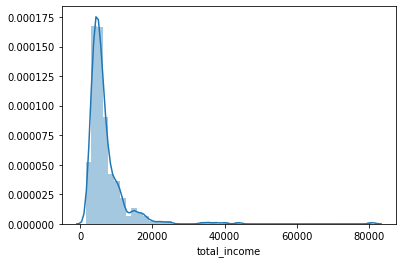

In [87]:
sns.distplot(df['total_income'])

In [101]:
df[(df['LoanAmount'] >350)]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,total_income,Loan_Amount_Term_Years
120,Male,Yes,3,Graduate,No,600,0,Semiurban,Y,39999.0,15.0
137,Male,Yes,3,Graduate,No,495,0,Semiurban,N,16816.0,30.0
220,Male,Yes,0,Graduate,No,436,1,Semiurban,Y,14583.0,30.0
244,Male,No,0,Graduate,No,480,1,Rural,N,20233.0,30.0
254,Male,Yes,1,Graduate,Yes,376,0,Rural,N,13649.0,30.0
286,Male,Yes,0,Graduate,No,570,1,Rural,N,24996.0,30.0
289,Male,Yes,2,Graduate,Yes,380,1,Rural,Y,17196.0,25.0
319,Male,Yes,3,Graduate,No,360,0,Rural,N,81000.0,30.0
380,Male,Yes,1,Graduate,No,500,1,Urban,N,18333.0,30.0
409,Male,Yes,2,Graduate,Yes,480,1,Rural,Y,15114.0,30.0


In [96]:
#Records with total income greater than 15000 have opted for higher LoanAmount(>350)

In [90]:
df[(df['LoanAmount'] > 300) & (df['total_income'] >20000)]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,total_income,Loan_Amount_Term_Years
8,Male,Yes,1,Graduate,No,349,1,Semiurban,N,23809.0,30.0
120,Male,Yes,3,Graduate,No,600,0,Semiurban,Y,39999.0,15.0
244,Male,No,0,Graduate,No,480,1,Rural,N,20233.0,30.0
286,Male,Yes,0,Graduate,No,570,1,Rural,N,24996.0,30.0
319,Male,Yes,3,Graduate,No,360,0,Rural,N,81000.0,30.0


In [92]:
len(df[(df['LoanAmount'] > 300) & (df['total_income'] >20000)])

5